In [1]:
def one_gram(sent, sep="<tokesep>"):
    return set(sent.split(sep)) 
def two_gram(sent, sep="<tokesep>"):
    last = ""
    grams = []
    first = True
    for word in sent.split(sep):
        if first:
            first = False
        else:
            grams.append("{} {}".format(last, word))
        last = word
    return set(grams)
def cal_rouge(evaluated_ngrams, reference_ngrams):
    reference_count = len(reference_ngrams)
    evaluated_count = len(evaluated_ngrams)

    overlapping_ngrams = evaluated_ngrams.intersection(reference_ngrams)
    overlapping_count = len(overlapping_ngrams)

    if evaluated_count == 0:
        precision = 0.0
    else:
        precision = overlapping_count / evaluated_count

    if reference_count == 0:
        recall = 0.0
    else:
        recall = overlapping_count / reference_count

    f1_score = 2.0 * ((precision * recall) / (precision + recall + 1e-8))
    return {"f": f1_score, "p": precision, "r": recall}

In [8]:
file = "result.4000"
path = "random/"+file
cand = path+".candidate"
gold = path+".gold"
result = file+".rouge"

In [9]:
reader_cand = open(cand)
reader_gold = open(gold)
writer_result = open(result,"w")

rouge_1 = {"f": 0, "p": 0, "r": 0}
rouge_2 = {"f": 0, "p": 0, "r": 0}
count = 0

while True:
    cand_line = reader_cand.readline().replace("\n","")
    gold_line = reader_gold.readline().replace("\n","")
    if not cand_line:
        break

    count += 1
    gram_1 = cal_rouge(one_gram(cand_line," "), one_gram(gold_line," "))
    gram_2 = cal_rouge(two_gram(cand_line," "), two_gram(gold_line," "))
    rouge_1["f"] += gram_1["f"]
    rouge_1["p"] += gram_1["p"]
    rouge_1["r"] += gram_1["r"]
    rouge_2["f"] += gram_2["f"]
    rouge_2["p"] += gram_2["p"]
    rouge_2["r"] += gram_2["r"]
    
    writer_result.write(str(gram_1)+", "+str(gram_2)+"\n")
    
reader_cand.close()
reader_gold.close()
writer_result.close()

In [10]:
rouge_1["f"] /= count 
rouge_1["p"] /= count 
rouge_1["r"] /= count 
rouge_2["f"] /= count 
rouge_2["p"] /= count 
rouge_2["r"] /= count 
rouge_1, rouge_2

({'f': 0.0773951396104181,
  'p': 0.059357671878184505,
  'r': 0.14298744685154938},
 {'f': 0.014224901807960303,
  'p': 0.0094699182258489,
  'r': 0.04060034505981974})

In [7]:
rouge_1["f"] /= count 
rouge_1["p"] /= count 
rouge_1["r"] /= count 
rouge_2["f"] /= count 
rouge_2["p"] /= count 
rouge_2["r"] /= count 
rouge_1, rouge_2

({'f': 0.09343767757947437,
  'p': 0.10878549832631461,
  'r': 0.09559463118136585},
 {'f': 0.02638802336725404,
  'p': 0.02959183673469388,
  'r': 0.03026812095689648})

In [ ]:
import random
a = list(range(0,len(res)))
random.shuffle(a)

In [30]:
file = "result.4000"
path = "random/"+file
cand = path+".candidate"
gold = path+".gold"

In [31]:
reader_cand = open(cand)
reader_gold = open(gold)


res = []
count = 0

while True:
    cand_line = reader_cand.readline().replace("\n","")
    gold_line = reader_gold.readline().replace("\n","")
    if not cand_line:
        break

    count += 1
    gram_1 = cal_rouge(one_gram(cand_line," "), one_gram(gold_line," "))
    gram_2 = cal_rouge(two_gram(cand_line," "), two_gram(gold_line," "))
    
    res.append("{}\t{}\t{}\t{}\t{}\n".format(cand_line, gold_line, gram_1["f"],gram_1["p"],gram_1["r"]))
    

    
reader_cand.close()
reader_gold.close()
# writer_result.close()

In [32]:
result = file+".randomseq.tsv"
writer_result = open(result,"w")
for index in a:
    writer_result.write(res[index])
writer_result.close()

In [42]:
file = "LP.result.4000"
path = "random/"+file
cand = path+".candidate"
gold = path+".gold"

In [43]:
reader_cand = open(cand)

res = []
count = 0

while True:
    cand_line = reader_cand.readline().replace("\n","")
    if not cand_line:
        break

    count += 1
    res.append(len(cand_line.split(" ")))  

reader_cand.close()

In [89]:
import matplotlib.pyplot as plt
def plot_hist(data, bins, title, xlabel, ylabel):
    plt.hist(data, bins=bins, histtype="bar", rwidth=0.9, alpha=0.6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def plot_box(data, title="", xlabel="", ylabel=""):
    print("Range:", "({}, {})".format(min(data), max(data)))
    print("  Avg:", sum(data)/len(data))
    plt.boxplot(data, vert=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def plot_stat(data, bins=None, describe=""):
    plot_box(data, "Box: "+describe, "count", describe)
    plot_hist(data, bins, "Hist: "+describe, describe, "count")

Range: (1, 9)
  Avg: 3.9223356009070294


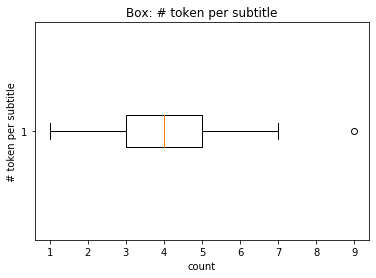

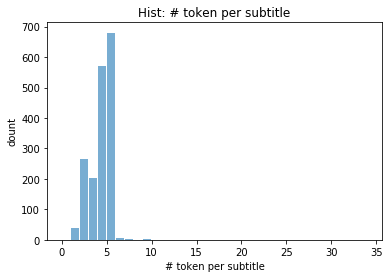

In [45]:
plot_stat(res, range(0, 35, 1), "# token per subtitle")

Range: (3, 49)
  Avg: 22.40185387131952


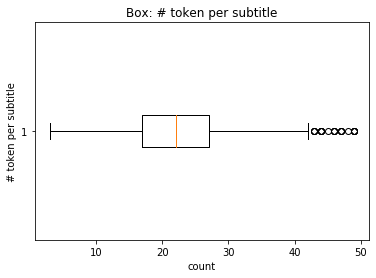

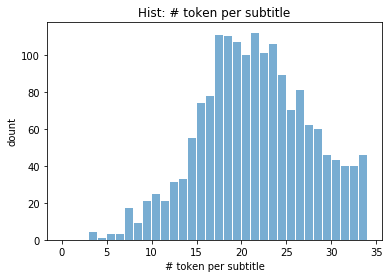

In [41]:
plot_stat(res, range(0, 35, 1), "# token per subtitle")

### 重复单词在原文中的出现频率

In [56]:
file = "LP.result.4000"
path = "random/"+file
cand = path+".candidate"
gold = path+".gold"
raw = path+".raw_src"

In [71]:
cand_line = {'dis',
 'eq',
 'mag',
 'news'}

In [69]:
token_gold

{'3',
 '4',
 ':',
 '[',
 ']',
 'edis',
 'eq',
 'mag',
 'news',
 'statewide',
 'washington'}

In [116]:
reader_cand = open(cand)
reader_gold = open(gold)
reader_raw = open(raw)

result_inin = []
result_outout = []

count = 0

while True:  
    cand_line = reader_cand.readline().replace("\n","")
    gold_line = reader_gold.readline().replace("\n","")
    raw_line = reader_raw.readline().replace("\n","")
    if not cand_line:
        break
        
    inin = 0
    incount = 0
    outout = 0
    outcount = 0

    count += 1
    token_cand = one_gram(cand_line," ")
    token_gold = one_gram(gold_line," ")
    token_raw = one_gram(raw_line," ")
    
   
    for token in token_gold:
        if token in token_cand:
            incount += 1
            if token in token_raw:
                inin += 1
        else:
            outcount += 1
            if token not in token_raw:
                outout += 1
    
    if incount != 0:
        result_inin.append(inin/incount)
    if outcount != 0:
        result_outout.append(outout/outcount)
    
reader_cand.close()
reader_gold.close()
reader_raw.close()

Range: (0.0, 1.0)
  Avg: 0.5261247441189296


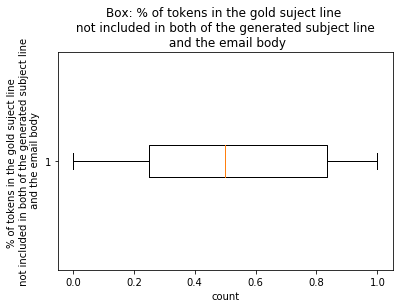

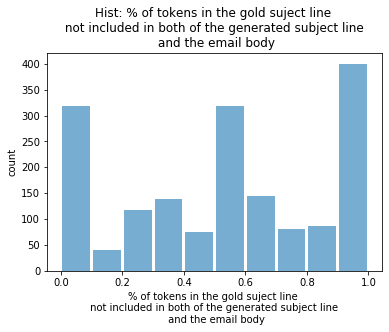

In [123]:
plot_stat(result_outout, None, "% of tokens in the gold suject line \n not included in both of the generated subject line \n and the email body")

Range: (0.0, 1.0)
  Avg: 0.6255956780347026


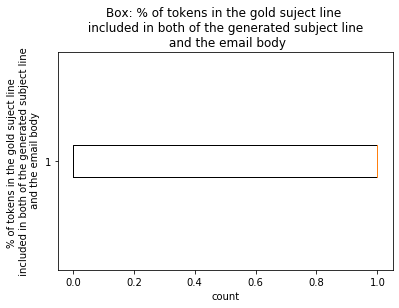

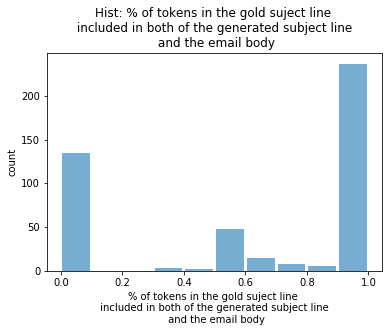

In [124]:
plot_stat(result_inin, None, "% of tokens in the gold suject line \n included in both of the generated subject line \n and the email body")